# MIMIC-II IAC

In [1]:
import ehrapy.api as ep
import seaborn as sns
import matplotlib.pyplot as plt
import cellrank as cr
from cellrank.tl.kernels import ConnectivityKernel
import scvelo as scv

Unable to contact PyPI to check for the latest ehrapy version. Do you have an internet 
connection?

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
adata = ep.dt.mimic_2(encoded=True)

In [3]:
ep.pp.knn_impute(adata)

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

In [4]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")

... storing 'service_unit' as categorical
... storing 'day_icu_intime' as categorical


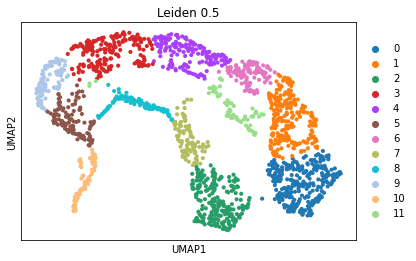

In [5]:
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [6]:
ck = ConnectivityKernel(adata)

In [7]:
ck.compute_transition_matrix()

<ConnectivityKernel>

In [8]:
ck.compute_projection(basis="umap")

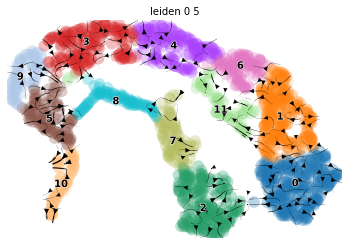

In [9]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap", color="leiden_0_5")

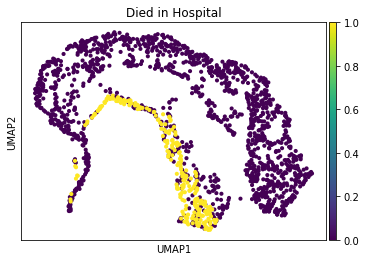

In [10]:
ep.pl.umap(adata, color="hosp_exp_flg", title="Died in Hospital")

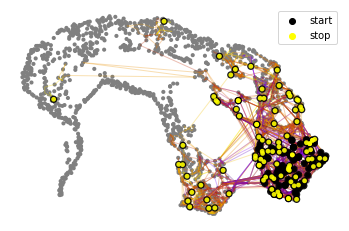

In [11]:
ck.plot_random_walks(
    100,
    start_ixs={"leiden_0_5": "0"},
    max_iter=100,
    show_progress_bar=False,
    ixs_legend_loc="best",
    seed=42,
)

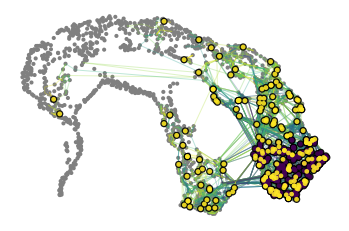

In [12]:
ck.plot_random_walks(
    200,
    start_ixs={"leiden_0_5": "0"},
    stop_ixs={"leiden_0_5": ["8", "7", "2"]},
    max_iter=100,
    successive_hits=50,
    show_progress_bar=False,
    cmap="viridis",
    seed=42,
)

In [13]:
g = cr.tl.estimators.GPCCA(ck)

In [14]:
g.compute_schur(n_components=3)

In [15]:
g.compute_macrostates(n_states=10, cluster_key="leiden_0_5")

In [16]:
g.macrostates_memberships

10_1,10_2,8,7,9,3,2,4,1,0
0.001105,0.032932,0.437705,0.111600,0.069841,0.129685,0.108231,0.092249,0.010048,0.006604
0.001106,0.039946,0.046787,0.104198,0.122662,0.092882,0.015358,0.019077,0.357091,0.200893
0.002091,0.011074,0.035059,0.111291,0.121188,0.288085,0.004657,0.377381,0.008051,0.041124
0.002849,0.101388,0.378526,0.020788,0.105958,0.220066,0.105980,0.037401,0.027016,0.000026
0.006228,0.011723,0.058204,0.109241,0.152738,0.454173,0.008711,0.154613,0.019066,0.025302
0.000714,0.005817,0.048633,0.112713,0.117452,0.162201,0.011017,0.461570,0.038270,0.041613
0.000610,0.040739,0.046733,0.106109,0.122884,0.088964,0.019886,0.018570,0.380992,0.174513
0.000010,0.033302,0.058609,0.090563,0.134922,0.048208,0.009171,0.089903,0.450501,0.084811
0.000172,0.038506,0.051950,0.098409,0.128528,0.071425,0.010049,0.047939,0.425128,0.127895
0.014779,0.270624,0.284523,0.008384,0.115956,0.152323,0.089860,0.038520,0.020577,0.004455


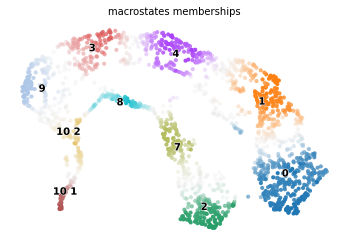

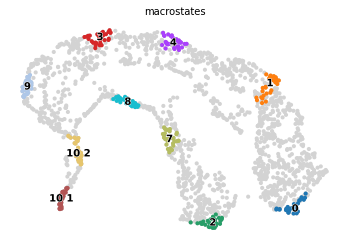

In [17]:
g.plot_macrostates()
g.plot_macrostates(discrete=True)

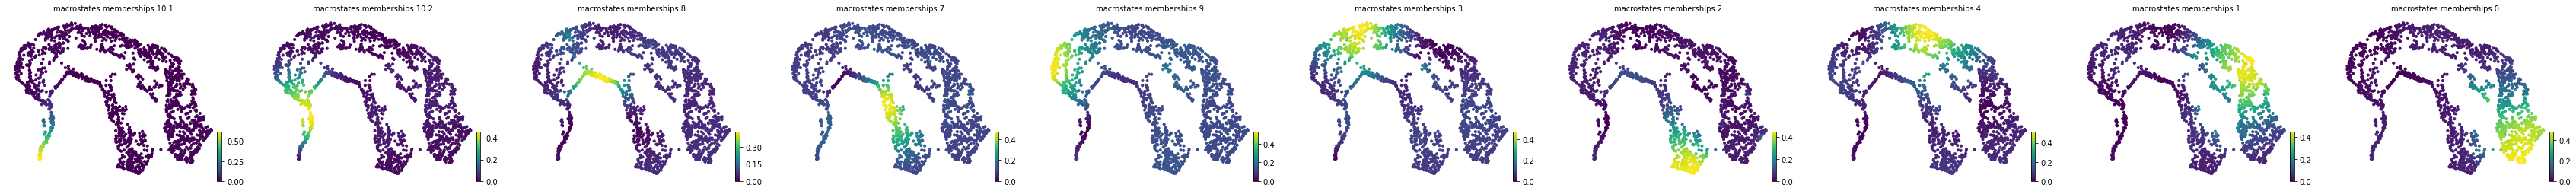

In [18]:
g.plot_macrostates(same_plot=False)

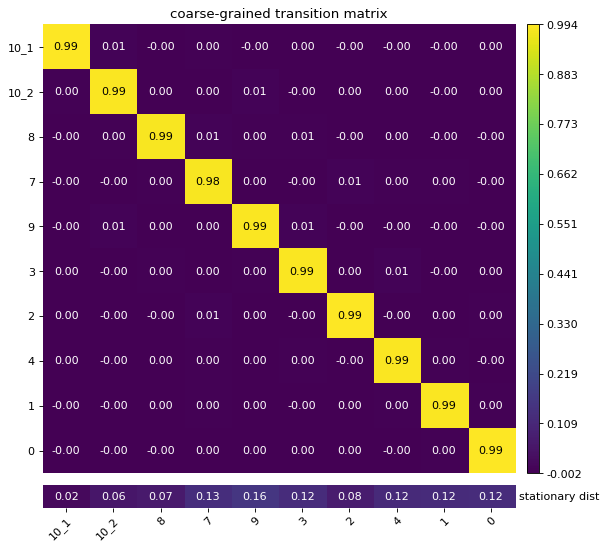

In [19]:
g.plot_coarse_T(text_kwargs={"fontsize": 10})

In [20]:
# g.set_terminal_states({"8": adata[adata.obs["leiden_0_5"] == "8"].obs_names})

In [21]:
g.set_terminal_states_from_macrostates(["8", "7", "2"])

In [22]:
# g.compute_terminal_states(method="eigengap")

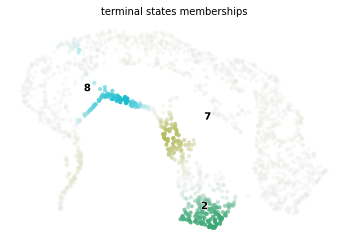

In [23]:
g.plot_terminal_states()

In [24]:
g.compute_absorption_probabilities()

Defaulting to `'gmres'` solver.


  0%|          | 0/3 [00:00<?, ?/s]

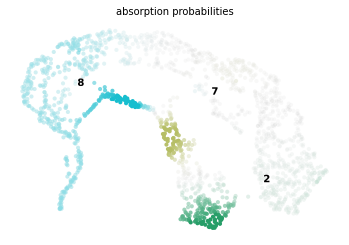

In [25]:
g.plot_absorption_probabilities()

In [26]:
g.compute_absorption_probabilities(time_to_absorption="all")
g.absorption_times

  0%|          | 0/3 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

,"8, 7, 2 mean"
0,0.000000
1,693.089783
2,780.903076
3,315.634888
4,787.565918
...,...
1771,105.309235
1772,152.750946
1773,114.420593
1774,209.074142


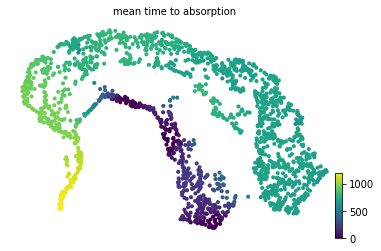

In [30]:
adata.obs["mean_time_to_absorption"] = g.absorption_times["8, 7, 2 mean"]
scv.pl.scatter(adata, color="mean_time_to_absorption")

In [31]:
g.compute_lineage_drivers()

,8_corr,8_pval,8_qval,8_ci_low,8_ci_high,7_corr,7_pval,7_qval,7_ci_low,7_ci_high,2_corr,2_pval,2_qval,2_ci_low,2_ci_high
iv_day_1,0.792055,0.000000e+00,NaN,0.774059,0.808773,-0.293737,3.377978e-37,NaN,-0.335665,-0.250648,-0.663982,1.080283e-248,NaN,-0.689210,-0.637146
censor_flg,0.188823,8.462257e-16,NaN,0.143570,0.233287,-0.033649,1.563667e-01,NaN,-0.080037,0.012885,-0.185494,2.742551e-15,NaN,-0.230023,-0.140190
mort_day_censored,0.171436,3.084348e-13,NaN,0.125927,0.216226,-0.033607,1.568897e-01,NaN,-0.079995,0.012927,-0.166134,1.655098e-12,NaN,-0.211017,-0.120551
service_num,0.106381,6.912009e-06,NaN,0.060165,0.152141,0.003853,8.711185e-01,NaN,-0.042668,0.050358,-0.121469,2.746165e-07,NaN,-0.167039,-0.075381
hr_1st,0.095594,5.402453e-05,NaN,0.049299,0.141478,-0.069715,3.279496e-03,NaN,-0.115853,-0.023277,-0.054591,2.139507e-02,NaN,-0.100848,-0.008098
aline_flg,0.093576,7.757085e-05,NaN,0.047269,0.139483,-0.039752,9.399267e-02,NaN,-0.086106,0.006775,-0.074679,1.630576e-03,NaN,-0.120773,-0.028264
ehrapycat_service_unit,0.089368,1.612308e-04,NaN,0.043034,0.135320,0.000473,9.841267e-01,NaN,-0.046042,0.046985,-0.099981,2.400022e-05,NaN,-0.145816,-0.053717
gender_num,0.083839,4.023858e-04,NaN,0.037471,0.129846,-0.020051,3.984569e-01,NaN,-0.066502,0.026488,-0.078518,9.230508e-04,NaN,-0.124577,-0.032122
wbc_first,0.079581,7.849969e-04,NaN,0.033191,0.125630,-0.019686,4.070841e-01,NaN,-0.066139,0.026852,-0.074043,1.787511e-03,NaN,-0.120143,-0.027624
po2_first,0.067082,4.671060e-03,NaN,0.020633,0.113243,0.012645,5.944125e-01,NaN,-0.033889,0.059123,-0.084214,3.788274e-04,NaN,-0.130217,-0.037848


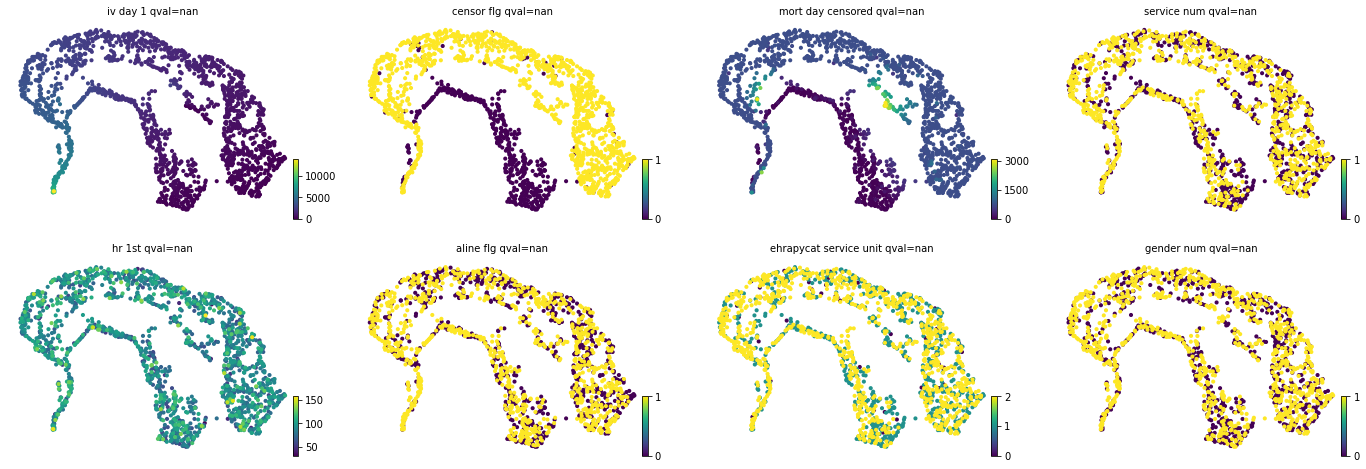

In [38]:
g.plot_lineage_drivers(lineage="8")

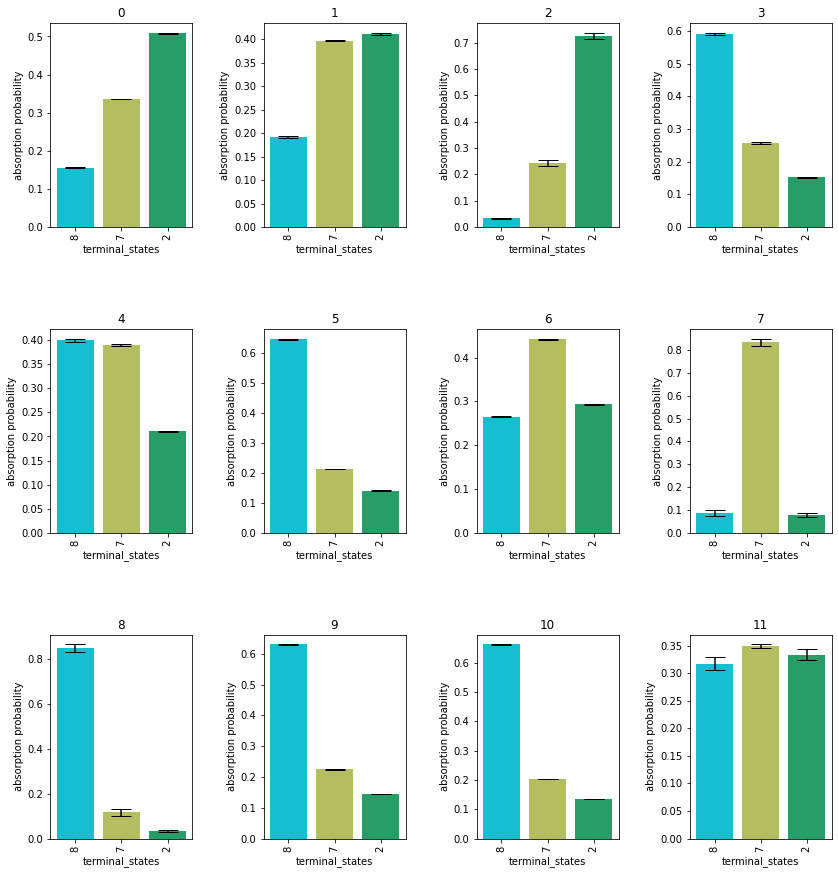

In [42]:
cr.pl.cluster_fates(adata, mode="bar", cluster_key="leiden_0_5")

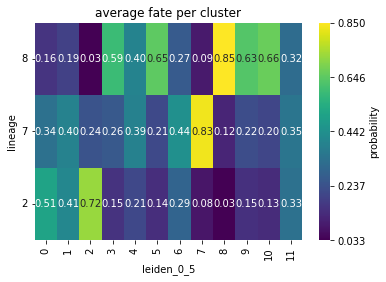

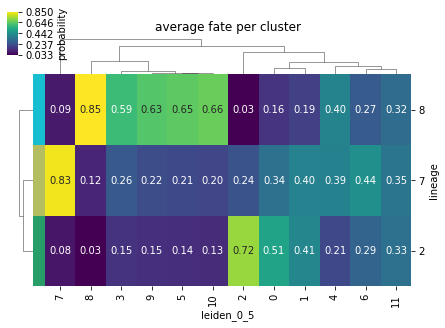

In [44]:
cr.pl.cluster_fates(adata, mode="heatmap", cluster_key="leiden_0_5")
cr.pl.cluster_fates(adata, mode="clustermap", cluster_key="leiden_0_5")

In [49]:
ep.tl.paga(adata, groups="leiden_0_5")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


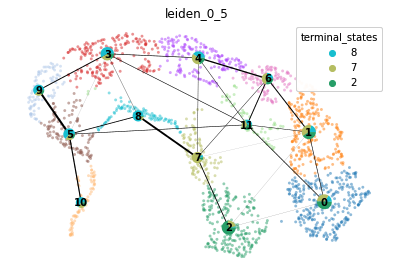

In [50]:
cr.pl.cluster_fates(adata, mode="paga_pie", basis="umap", cluster_key="leiden_0_5")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/networkx/dra

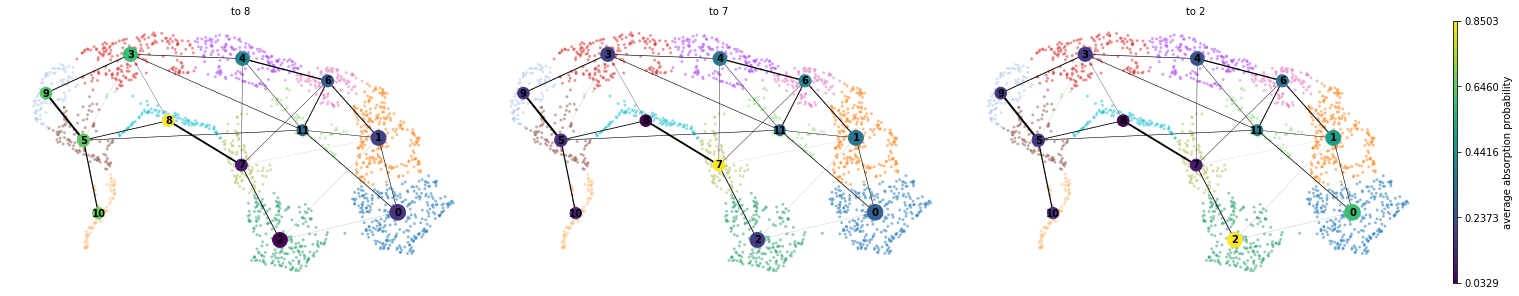

In [52]:
cr.pl.cluster_fates(adata, mode="paga", legend_loc="on data", basis="umap", cluster_key="leiden_0_5")

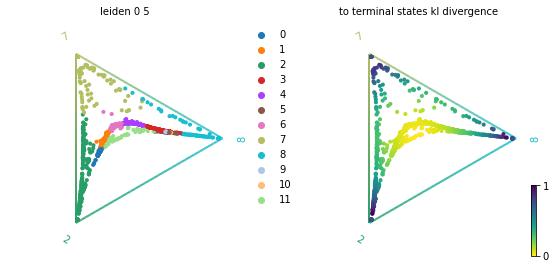

In [53]:
cr.pl.circular_projection(
    adata, keys=["leiden_0_5", "kl_divergence"], legend_loc="upper right"
)

In [63]:
import numpy as np

adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_0_5'] == '0')[0]
ep.tl.dpt(adata)

  0%|          | 0/1 [00:00<?, ?gene/s]

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

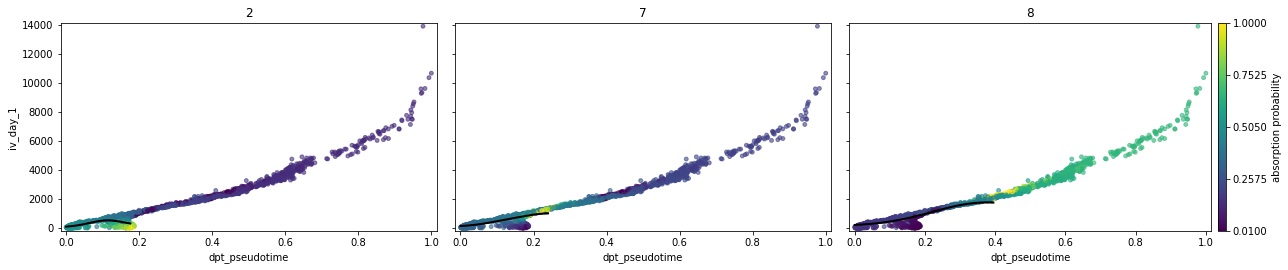

In [64]:
model = cr.ul.models.GAM(adata)
cr.pl.gene_trends(
    adata,
    model,
    ["iv_day_1"],
    time_key="dpt_pseudotime",
    show_progress_bar=False,
)


  0%|          | 0/1 [00:00<?, ?gene/s]

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

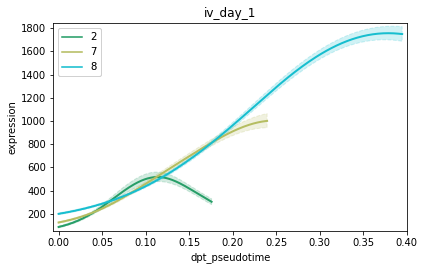

In [65]:
cr.pl.gene_trends(
    adata,
    model,
    ["iv_day_1"],
    same_plot=True,
    hide_cells=True,
    time_key="dpt_pseudotime",
    show_progress_bar=False,
)